In [7]:
import numpy as np
import pandas as pd
import scipy
from sunpy.time import parse_time
import copy
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import urllib
import json
import os
import pdb
import scipy.io
import pickle
import sys
import matplotlib.pyplot as plt


def expon(x, a, k, b):
    return a*np.exp(k*x) + b


sns.set_style('darkgrid')
sns.set_context('paper')   

In [13]:
t_start=parse_time('2020-02-24 12:00').datetime
t_end=parse_time('2020-03-18 12:00').datetime

dates=parse_time([t_start + datetime.timedelta(days=1*n) for n in range((t_end - t_start).days)]).datetime
cases=[2, 2, 3, 3, 9, 14, 18, 21, 29, 41, 55, 79, 104, 131, 182, 246, 302, 504, 655, 860, 1016,1332, 1471]

dates1=parse_time(dates).plot_date
dates1=dates1-dates1[0] 

param = scipy.optimize.curve_fit(expon, dates1, cases )

p1=param[0][0]
p2=param[0][1]
p3=param[0][2]

t_end2=parse_time('2020-03-25 12:00').datetime

dates_fut=parse_time([t_start + datetime.timedelta(days=n) for n in range((t_end2 - t_start).days)]).plot_date
dates_fut1=dates_fut-dates_fut[0]

fit=expon(dates_fut1,p1,p2,p3)

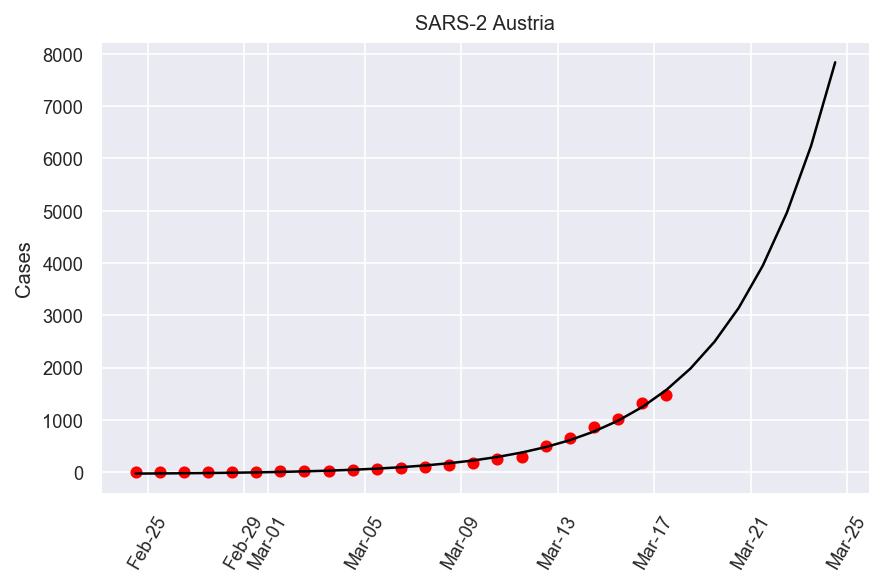

In [23]:
plt.figure(1,figsize=(6,4),dpi=150)
ax1 = plt.subplot(111) 


#ax1.plot(dates,cases,'-b')
ax1.plot(dates,cases,'or')

plt.plot(dates_fut,fit,'-k')
ax1.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )
plt.xticks(rotation=60)
plt.ylabel('Cases')
plt.xlim()
plt.title('SARS-2 Austria')

plt.tight_layout()